In [22]:
if (!requireNamespace(c("DOSE"), quietly = TRUE)) {
    BiocManager::install("DOSE")
    BiocManager::install("clusterProfiler")
    BiocManager::install("enrichplot")
}

In [23]:
library(DOSE)
library(clusterProfiler)
library(enrichplot)

In [4]:
# Получаем данные 
data(geneList)

In [6]:
genes <- names(geneList)[abs(geneList) > 1.5]
head(genes)

[1] "4312"  "8318"  "10874" "55143" "55388" "991"

In [8]:
x <- enrichDO(gene          = genes,
              ont           = "DO",
              pvalueCutoff  = 0.05,
              pAdjustMethod = "BH",
              universe      = names(geneList),
              minGSSize     = 5,
              maxGSSize     = 500,
              qvalueCutoff  = 0.05,
              readable      = FALSE)
head(x)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
DOID:170,DOID:170,endocrine gland cancer,48/331,472/6268,5.662129e-06,0.004784499,0.003826407,10874/7153/1381/6241/11065/10232/332/6286/2146/10112/891/9232/4171/993/5347/4318/3576/1515/4821/8836/3159/7980/5888/333/898/9768/4288/3551/2152/9590/185/7043/3357/2952/5327/3667/1634/1287/4582/7122/3479/4680/6424/80310/652/8839/9547/1524,48
DOID:10283,DOID:10283,prostate cancer,40/331,394/6268,3.859157e-05,0.013921739,0.011133923,4312/6280/6279/597/3627/332/6286/2146/4321/4521/891/5347/4102/4318/701/3576/79852/10321/6352/4288/3551/2152/247/2952/3487/367/3667/4128/4582/563/3679/4117/7031/3479/6424/10451/80310/652/4036/10551,40
DOID:3459,DOID:3459,breast carcinoma,37/331,357/6268,4.942629e-05,0.013921739,0.011133923,4312/6280/6279/7153/4751/890/4085/332/6286/6790/891/9232/10855/4171/5347/4318/701/2633/3576/9636/898/8792/4288/2952/4982/4128/4582/7031/3479/771/4250/2066/3169/10647/5304/5241/10551,37
DOID:3856,DOID:3856,male reproductive organ cancer,40/331,404/6268,6.821467e-05,0.014410349,0.011524689,4312/6280/6279/597/3627/332/6286/2146/4321/4521/891/5347/4102/4318/701/3576/79852/10321/6352/4288/3551/2152/247/2952/3487/367/3667/4128/4582/563/3679/4117/7031/3479/6424/10451/80310/652/4036/10551,40
DOID:824,DOID:824,periodontitis,16/331,109/6268,1.699304e-04,0.018859464,0.015082872,4312/6279/820/7850/4321/3595/4318/4069/3576/1493/6352/8842/185/2952/5327/4982,16
DOID:3905,DOID:3905,lung carcinoma,43/331,465/6268,1.749754e-04,0.018859464,0.015082872,4312/6280/2305/9133/6279/7153/6278/6241/55165/11065/8140/10232/332/6286/3002/9212/4521/891/4171/9928/8061/4318/3576/1978/1894/7980/7083/898/6352/8842/4288/2152/2697/2952/3572/4582/7049/563/3479/1846/3117/2532/2922,43


In [9]:
x <- setReadable(x, 'org.Hs.eg.db')
head(x)

Loading required package: org.Hs.eg.db

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
DOID:170,DOID:170,endocrine gland cancer,48/331,472/6268,5.662129e-06,0.004784499,0.003826407,NMU/TOP2A/CRABP1/RRM2/UBE2C/MSLN/BIRC5/S100P/EZH2/KIF20A/CCNB1/PTTG1/MCM2/CDC25A/PLK1/MMP9/CXCL8/CTSV/NKX2-2/GGH/HMGA1/TFPI2/RAD51/APLP1/CCNE1/PCLAF/MKI67/IKBKB/F3/AKAP12/AGTR1/TGFB3/HTR2B/GSTT1/PLAT/IRS1/DCN/COL4A5/MUC1/CLDN5/IGF1/CEACAM6/SFRP4/PDGFD/BMP4/CCN5/CXCL14/CX3CR1,48
DOID:10283,DOID:10283,prostate cancer,40/331,394/6268,3.859157e-05,0.013921739,0.011133923,MMP1/S100A9/S100A8/BCL2A1/CXCL10/BIRC5/S100P/EZH2/MMP12/NUDT1/CCNB1/PLK1/MAGEA3/MMP9/BUB1B/CXCL8/EPHX3/CRISP3/CCL5/MKI67/IKBKB/F3/ALOX15B/GSTT1/IGFBP4/AR/IRS1/MAOA/MUC1/AZGP1/ITGA7/MAK/TFF1/IGF1/SFRP4/VAV3/PDGFD/BMP4/LRP2/AGR2,40
DOID:3459,DOID:3459,breast carcinoma,37/331,357/6268,4.942629e-05,0.013921739,0.011133923,MMP1/S100A9/S100A8/TOP2A/NEK2/CCNA2/MAD2L1/BIRC5/S100P/AURKA/CCNB1/PTTG1/HPSE/MCM2/PLK1/MMP9/BUB1B/GBP1/CXCL8/ISG15/CCNE1/TNFRSF11A/MKI67/GSTT1/TNFRSF11B/MAOA/MUC1/TFF1/IGF1/CA12/SCGB2A2/ERBB4/FOXA1/SCGB1D2/PIP/PGR/AGR2,37
DOID:3856,DOID:3856,male reproductive organ cancer,40/331,404/6268,6.821467e-05,0.014410349,0.011524689,MMP1/S100A9/S100A8/BCL2A1/CXCL10/BIRC5/S100P/EZH2/MMP12/NUDT1/CCNB1/PLK1/MAGEA3/MMP9/BUB1B/CXCL8/EPHX3/CRISP3/CCL5/MKI67/IKBKB/F3/ALOX15B/GSTT1/IGFBP4/AR/IRS1/MAOA/MUC1/AZGP1/ITGA7/MAK/TFF1/IGF1/SFRP4/VAV3/PDGFD/BMP4/LRP2/AGR2,40
DOID:824,DOID:824,periodontitis,16/331,109/6268,1.699304e-04,0.018859464,0.015082872,MMP1/S100A8/CAMP/IL1R2/MMP12/IL12RB2/MMP9/LYZ/CXCL8/CTLA4/CCL5/PROM1/AGTR1/GSTT1/PLAT/TNFRSF11B,16
DOID:3905,DOID:3905,lung carcinoma,43/331,465/6268,1.749754e-04,0.018859464,0.015082872,MMP1/S100A9/FOXM1/CCNB2/S100A8/TOP2A/S100A7/RRM2/CEP55/UBE2C/SLC7A5/MSLN/BIRC5/S100P/GZMB/AURKB/NUDT1/CCNB1/MCM2/KIF14/FOSL1/MMP9/CXCL8/EIF4EBP1/ECT2/TFPI2/TK1/CCNE1/CCL5/PROM1/MKI67/F3/GJA1/GSTT1/IL6ST/MUC1/TGFBR3/AZGP1/IGF1/DUSP4/HLA-DQA1/ACKR1/GRP,43


In [10]:
gene2 <- names(geneList)[abs(geneList) < 3]
ncg <- enrichNCG(gene2)
head(ncg)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
soft_tissue_sarcomas,soft_tissue_sarcomas,soft_tissue_sarcomas,28/1172,28/1571,0.0002517511,0.008056037,0.006360029,1029/999/6850/4914/4342/2185/55294/2041/4851/23512/2044/4058/5290/8726/4486/5297/5728/3815/2324/7403/5925/4763/1499/7157/5159/2045/3667/2066,28
bladder,bladder,bladder,61/1172,67/1571,0.0005108168,0.008173069,0.006452423,9700/2175/9603/1029/8997/688/1026/896/677/6256/55294/8085/4851/3265/1999/3845/8243/10605/8295/4854/5290/2033/4780/23224/23217/2064/23385/55252/10735/4853/387/288/30849/9794/7403/287/463/472/4297/2065/2262/8289/9611/5925/2068/4763/7157/2186/1387/3910/2261/7248/23037/23345/7832/79633/10628/22906/388/4036/3169,61
glioma,glioma,glioma,68/1172,76/1571,0.0008511747,0.009079196,0.007167787,4603/4609/1029/3418/8877/1019/7027/4613/1030/1956/1106/2264/3417/6597/4914/55359/896/894/2321/3954/5335/5781/8439/673/9444/4851/8087/2050/8493/3845/3482/667/56999/5290/2033/4233/577/5894/5156/80036/9407/3020/1021/5598/5728/8621/1828/63035/23592/8880/2260/54880/4916/2263/1639/90/546/8289/4763/7157/23152/5295/4602/595/2261/6938/4915/26137,68


In [13]:
head(ncg)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
soft_tissue_sarcomas,soft_tissue_sarcomas,soft_tissue_sarcomas,28/1172,28/1571,0.0002517511,0.008056037,0.006360029,1029/999/6850/4914/4342/2185/55294/2041/4851/23512/2044/4058/5290/8726/4486/5297/5728/3815/2324/7403/5925/4763/1499/7157/5159/2045/3667/2066,28
bladder,bladder,bladder,61/1172,67/1571,0.0005108168,0.008173069,0.006452423,9700/2175/9603/1029/8997/688/1026/896/677/6256/55294/8085/4851/3265/1999/3845/8243/10605/8295/4854/5290/2033/4780/23224/23217/2064/23385/55252/10735/4853/387/288/30849/9794/7403/287/463/472/4297/2065/2262/8289/9611/5925/2068/4763/7157/2186/1387/3910/2261/7248/23037/23345/7832/79633/10628/22906/388/4036/3169,61
glioma,glioma,glioma,68/1172,76/1571,0.0008511747,0.009079196,0.007167787,4603/4609/1029/3418/8877/1019/7027/4613/1030/1956/1106/2264/3417/6597/4914/55359/896/894/2321/3954/5335/5781/8439/673/9444/4851/8087/2050/8493/3845/3482/667/56999/5290/2033/4233/577/5894/5156/80036/9407/3020/1021/5598/5728/8621/1828/63035/23592/8880/2260/54880/4916/2263/1639/90/546/8289/4763/7157/23152/5295/4602/595/2261/6938/4915/26137,68


In [14]:
dgn <- enrichDGN(genes)
head(dgn)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
umls:C1134719,umls:C1134719,Invasive Ductal Breast Carcinoma,28/476,231/17381,4.312190e-11,1.225524e-07,9.164539e-08,9133/7153/6241/55165/11065/51203/22974/4751/5080/332/2568/3902/6790/891/24137/9232/10855/79801/4318/55635/5888/1493/9768/3070/4288/367/4582/5241,28
umls:C0032460,umls:C0032460,Polycystic Ovary Syndrome,38/476,434/17381,2.819624e-10,3.521620e-07,2.633487e-07,4312/6280/6279/7153/259266/6241/55165/55872/4085/6286/7272/366/891/4171/7941/1164/3161/4603/990/29127/4318/53335/3294/3070/2952/5327/367/3667/4582/563/27324/3479/114899/9370/2167/652/5346/5241,38
umls:C0206698,umls:C0206698,Cholangiocarcinoma,36/476,399/17381,3.717403e-10,3.521620e-07,2.633487e-07,4312/2305/55872/4751/8140/10635/10232/5918/332/6286/2146/4521/891/10855/2921/7941/1164/4318/3576/1978/79852/8842/4485/214/65982/6863/1036/6935/4128/3572/4582/7031/7166/4680/80310/9,36
umls:C0007138,umls:C0007138,"Carcinoma, Transitional Cell",35/476,389/17381,7.093837e-10,5.040171e-07,3.769068e-07,4312/991/6280/6241/55165/10460/6373/8140/890/10232/4085/332/6286/2146/4171/1033/6364/5347/4318/3576/8836/9700/898/4288/2952/367/8382/2947/3479/9338/23158/2167/2066/2625/9,35
umls:C0031099,umls:C0031099,Periodontitis,28/476,270/17381,1.634417e-09,9.290027e-07,6.947133e-07,4312/6279/3669/820/7850/332/4321/6364/3595/4318/3576/3898/8792/1493/4485/10472/185/6863/2205/2952/5327/4982/23261/2200/3572/2006/1308/2625,28
umls:C0005695,umls:C0005695,Bladder Neoplasm,36/476,442/17381,5.871618e-09,2.781190e-06,2.079789e-06,4312/10874/6280/3868/6279/597/7153/6241/9582/10460/4085/5080/332/2146/6790/10855/4171/5347/4318/3576/8836/9636/9700/898/4288/214/2952/367/2947/4582/3479/6424/9338/2066/1580/9,36


In [15]:
snp <- c("rs1401296", "rs9315050", "rs5498", "rs1524668", "rs147377392",
         "rs841", "rs909253", "rs7193343", "rs3918232", "rs3760396",
         "rs2231137", "rs10947803", "rs17222919", "rs386602276", "rs11053646",
         "rs1805192", "rs139564723", "rs2230806", "rs20417", "rs966221")
dgnv <- enrichDGNv(snp)
head(dgnv)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
umls:C3272363,umls:C3272363,Ischemic Cerebrovascular Accident,20/20,141/46589,1.014503e-51,1.379725e-49,1.922217e-50,rs1401296/rs9315050/rs5498/rs1524668/rs147377392/rs841/rs909253/rs7193343/rs3918232/rs3760396/rs2231137/rs10947803/rs17222919/rs386602276/rs11053646/rs1805192/rs139564723/rs2230806/rs20417/rs966221,20
umls:C0948008,umls:C0948008,Ischemic stroke,20/20,148/46589,2.867870e-51,1.950151e-49,2.716929e-50,rs1401296/rs9315050/rs5498/rs1524668/rs147377392/rs841/rs909253/rs7193343/rs3918232/rs3760396/rs2231137/rs10947803/rs17222919/rs386602276/rs11053646/rs1805192/rs139564723/rs2230806/rs20417/rs966221,20
umls:C0038454,umls:C0038454,Cerebrovascular accident,7/20,243/46589,7.045680e-12,3.194042e-10,4.449903e-11,rs1524668/rs147377392/rs2231137/rs10947803/rs386602276/rs2230806/rs20417,7
umls:C0027051,umls:C0027051,Myocardial Infarction,6/20,163/46589,6.222154e-11,1.889883e-09,2.632964e-10,rs5498/rs147377392/rs909253/rs11053646/rs1805192/rs20417,6
umls:C0010054,umls:C0010054,Coronary Arteriosclerosis,6/20,166/46589,6.948100e-11,1.889883e-09,2.632964e-10,rs5498/rs147377392/rs11053646/rs1805192/rs2230806/rs20417,6
umls:C0010068,umls:C0010068,Coronary heart disease,6/20,314/46589,3.198889e-09,7.250815e-08,1.010175e-08,rs5498/rs147377392/rs11053646/rs1805192/rs2230806/rs20417,6


In [16]:
ncg <- gseNCG(geneList,
              nPerm         = 100,
              minGSSize     = 120,
              pvalueCutoff  = 0.2,
              pAdjustMethod = "BH",
              verbose       = FALSE)
ncg <- setReadable(ncg, 'org.Hs.eg.db')
head(ncg, 3)

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
no term enriched under specific pvalueCutoff...



ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [17]:
dgn <- gseDGN(geneList,
              nPerm         = 100,
              minGSSize     = 120,
              pvalueCutoff  = 0.2,
              pAdjustMethod = "BH",
              verbose       = FALSE)
dgn <- setReadable(dgn, 'org.Hs.eg.db')
head(dgn, 3)

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”


,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
umls:C0029456,umls:C0029456,Osteoporosis,375,-0.3439046,-1.517013,0.01219512,0.1130653,0.07140968,1766,"tags=23%, list=14%, signal=20%",RXRG/HGF/PTH1R/CYP1A1/JAG1/ROR2/FLT3/CUL9/EEF1A2/THSD4/BCL2/ITGAV/WIF1/GREM2/COL15A1/HPGDS/VGLL3/SLIT3/NRIP1/TMEM135/MGP/PLCL1/OSBPL1A/PIBF1/SELP/SPRY1/MMP13/ID4/SPP2/COL1A2/AOX1/ARHGEF3/GSN/TSC22D3/ATP1B1/NR5A2/ANKH/COL1A1/LEPR/THSD7A/GC/FGF2/PPARG/NOX4/ZNF266/GHRH/BHLHE40/SLC19A2/THBD/FLNB/KL/LEP/HSD17B4/CTSK/FTO/MMP2/ESR1/IGF1R/PTN/IRAK3/HSPA1L/CST3/GHR/SPARC/KDM4B/LRP1/INPP4B/BMPR1B/PTHLH/DPT/FRZB/GSTT1/AR/TNFRSF11B/IRS1/WLS/GSTM3/TGFBR3/TPH1/IGF1/SFRP4/CORIN/BMP4/CHAD/FOXA1/PGR
umls:C1263846,umls:C1263846,Attention deficit hyperactivity disorder,321,-0.3132898,-1.350521,0.01250000,0.1130653,0.07140968,2176,"tags=25%, list=17%, signal=21%",SLC6A4/MYT1/EPB41L3/MAN2A2/DAB2/MAP1B/EMP2/BACH2/BDNF/CHPT1/NR3C1/IGBP1/DEAF1/CREBBP/ELK3/HKDC1/RARA/GRM5/TSPAN31/HTR1A/CEP112/VWA8/CYP2A6/FHIT/PRKG1/F2R/COL2A1/NGFR/PDLIM1/DBH/LGALS8/OXTR/FLNC/ADGRL3/SCARA3/VAMP2/NR4A2/MEIS2/PTPRN2/NELL2/NGF/UNC5B/BCHE/TGFB2/LIN7A/NRP1/AVPR1B/RPS2P45/ARSD/REEP5/DACT1/AGBL3/PPARG/TSPAN1/CDH13/SHH/ACKR3/LEP/FTO/PER2/ATXN1/CDH11/NTF3/TCIM/ASPA/EDNRA/NR3C2/ZNF385D/NTRK2/PCSK5/BMPR1B/PTHLH/SYT1/ASTN2/GJA1/LAMB2/MAOA/ADRA2A/TPH1/MAOB/ZNF423
umls:C0338656,umls:C0338656,Impaired cognition,342,-0.3266625,-1.417287,0.01265823,0.1130653,0.07140968,1997,"tags=23%, list=16%, signal=20%",BDNF/NR3C1/CAPN3/SLC2A10/CREBBP/ZNF224/ITM2B/ELK3/CLN5/GAD1/BACE1/HGF/SERPINA3/MBL2/SST/EGR1/INSR/UTRN/ARL4D/PVALB/EEF1A2/DYM/CD36/RAB40AL/RBMS3/TREM2/PER3/OXTR/TSC1/CDR1/IGFALS/TPPP/SELP/NGF/BCHE/KCNS3/APBB2/TRPM4/RUNX1T1/MME/ABCB1/PPARG/MVP/NME8/SPG11/LPL/SLC26A4/FHL5/KL/LEP/FTO/NAIP/SORL1/ESR1/ABCC8/CST3/LAMA2/HHAT/LRP1/CLU/ALB/SPON1/NTS/HTRA1/GSTT1/GRIA2/MAGI2/IRS1/TAT/COL4A5/AASS/IGF1/ITPR1/BMP4/LRP2/MAPT/ERBB4/GRP


In [25]:
ggo <- groupGO(gene     = genes,
               OrgDb    = org.Hs.eg.db,
               ont      = "CC",
               level    = 3,
               readable = TRUE)

head(ggo)

,ID,Description,Count,GeneRatio,geneID
,<chr>,<chr>,<int>,<chr>,<chr>
GO:0000131,GO:0000131,incipient cellular bud site,0,0/513,
GO:0000151,GO:0000151,ubiquitin ligase complex,6,6/513,CDC20/UBE2C/UBE2S/DTL/CKS2/BUB1B
GO:0000159,GO:0000159,protein phosphatase type 2A complex,0,0/513,
GO:0000178,GO:0000178,exosome (RNase complex),0,0/513,
GO:0000307,GO:0000307,cyclin-dependent protein kinase holoenzyme complex,6,6/513,CCNB2/CCNA2/CDK1/CCNB1/CKS2/CCNE1
GO:0000408,GO:0000408,EKC/KEOPS complex,0,0/513,


In [27]:
ego <- enrichGO(gene          = genes,
                universe      = names(geneList),
                OrgDb         = org.Hs.eg.db,
                ont           = "CC",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
        readable      = TRUE)
head(ego)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0031012,GO:0031012,extracellular matrix,54/494,427/11816,2.054982e-13,8.507624e-11,7.938718e-11,MMP1/S100A9/S100A8/S100A7/ADAMDEC1/MMP12/HPSE/MMP9/ORM1/CRISP3/TFPI2/APLP1/LAD1/FMOD/MST1/ANOS1/F3/TNN/TGFB3/SERPINA5/CPA3/LAMB2/TNFRSF11B/SPARCL1/COL10A1/FBN1/DCN/PODNL1/LRRC15/BCAM/TPSAB1/COL4A5/TGFBR3/AZGP1/THBS4/KERA/ELN/COL14A1/COL16A1/ADIPOQ/MMP28/OMD/COMP/COL17A1/CILP/CCN5/NDP/MATN3/CHAD/TPSB2/ASPN/LRRC17/MFAP4/OGN,54
GO:0000775,GO:0000775,"chromosome, centromeric region",29/494,154/11816,6.620424e-12,1.370428e-09,1.278787e-09,CDCA8/CENPE/NDC80/HJURP/SKA1/NEK2/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/CDT1/BIRC5/TTK/NCAPG/AURKB/AURKA/CCNB1/KIF2C/PLK1/BUB1B/ZWINT/CENPU/SPC25/SPAG5/DSCC1/CENPI/OIP5/HELLS,29
GO:0000779,GO:0000779,"condensed chromosome, centromeric region",22/494,91/11816,1.403812e-11,1.937261e-09,1.807716e-09,CENPE/NDC80/HJURP/SKA1/NEK2/CENPM/CENPN/ERCC6L/MAD2L1/CDT1/BIRC5/NCAPG/AURKB/AURKA/CCNB1/KIF2C/PLK1/BUB1B/ZWINT/CENPU/SPC25/SPAG5,22
GO:0000776,GO:0000776,kinetochore,23/494,107/11816,6.369148e-11,6.592068e-09,6.151256e-09,CENPE/NDC80/HJURP/SKA1/NEK2/CENPM/CENPN/ERCC6L/MAD2L1/KIF18A/CDT1/BIRC5/TTK/AURKB/CCNB1/KIF2C/PLK1/BUB1B/ZWINT/CENPU/SPC25/SPAG5/CENPI,23
GO:0072686,GO:0072686,mitotic spindle,21/494,92/11816,1.319768e-10,1.092768e-08,1.019694e-08,KIF23/CENPE/ASPM/SKA1/NUSAP1/TPX2/TACC3/CDK1/MAD2L1/KIF18A/KIF11/AURKB/KIFC1/KIF18B/AURKA/RACGAP1/SPAG5/ECT2/ESPL1/EFHC1/MAK,21
GO:0005819,GO:0005819,spindle,37/494,272/11816,1.916918e-10,1.322674e-08,1.234226e-08,CDCA8/CDC20/KIF23/CENPE/ASPM/DLGAP5/SKA1/NUSAP1/TPX2/TACC3/NEK2/CDK1/MAD2L1/KIF18A/BIRC5/KIF11/TTK/AURKB/PRC1/KIFC1/KIF18B/KIF20A/AURKA/CCNB1/KIF4A/KIF14/SHCBP1/CDC6/PLK1/RACGAP1/BUB1B/SPAG5/ECT2/ESPL1/KIF15/EFHC1/MAK,37


In [28]:
ecoli <- search_kegg_organism('Escherichia coli', by='scientific_name')
dim(ecoli)

[1] 65  3

In [29]:
head(ecoli)

,kegg_code,scientific_name,common_name
,<chr>,<chr>,<chr>
361,eco,Escherichia coli K-12 MG1655,NA
362,ecj,Escherichia coli K-12 W3110,NA
363,ecd,Escherichia coli K-12 DH10B,NA
364,ebw,Escherichia coli BW2952,NA
365,ecok,Escherichia coli K-12 MDS42,NA
366,ece,Escherichia coli O157:H7 EDL933 (EHEC),NA


In [31]:
kk2 <- gseKEGG(geneList     = geneList,
               organism     = 'hsa',
               nPerm        = 1000,
               minGSSize    = 120,
               pvalueCutoff = 0.05,
               verbose      = FALSE)
head(kk2)

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”


,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
hsa04151,hsa04151,PI3K-Akt signaling pathway,322,-0.3482755,-1.511692,0.001272265,0.02716535,0.01823456,1997,"tags=23%, list=16%, signal=20%",627/2252/7059/92579/5563/5295/6794/1288/7010/3910/3371/3082/1291/4602/3791/1027/90993/3441/3643/1129/2322/1975/7450/596/3685/1942/2149/1280/4804/3675/595/2261/7248/2246/4803/3912/1902/1278/1277/2846/2057/1293/2247/55970/5618/7058/10161/56034/3693/4254/3480/4908/5159/1292/3908/2690/3909/8817/9223/4915/3551/2791/63923/3913/9863/3667/1287/3679/7060/3479/80310/1311/5105/2066/1101
hsa04510,hsa04510,Focal adhesion,190,-0.4169068,-1.719651,0.001360544,0.02716535,0.01823456,2183,"tags=27%, list=17%, signal=22%",5595/5228/7424/1499/4636/83660/7059/5295/1288/23396/3910/3371/3082/1291/394/3791/7450/596/3685/1280/3675/595/2318/3912/1793/1278/1277/1293/10398/55742/2317/7058/25759/56034/3693/3480/5159/857/1292/3908/3909/63923/3913/1287/3679/7060/3479/10451/80310/1311/1101
hsa04218,hsa04218,Cellular senescence,141,0.4115945,1.760996,0.003448276,0.02716535,0.01823456,1155,"tags=17%, list=9%, signal=16%",2305/4605/9133/890/983/51806/1111/891/993/3576/1978/898/9134/4609/1869/1029/22808/1871/5499/91860/292/1019/11200/1875
hsa03013,hsa03013,RNA transport,135,0.4103684,1.736471,0.003521127,0.02716535,0.01823456,3383,"tags=39%, list=27%, signal=29%",10460/1978/55110/54913/9688/8894/11260/10799/9631/4116/5042/8761/6396/23165/8662/10248/55706/79833/9775/29107/23636/5905/9513/5901/10775/10557/4927/79902/1981/26986/11171/10762/8480/8891/11097/26019/55308/10940/4686/9972/81929/10556/3646/9470/387082/1977/57122/8563/7514/79023/3837/9818/56000
hsa05152,hsa05152,Tuberculosis,162,0.3745153,1.621292,0.003597122,0.02716535,0.01823456,2823,"tags=34%, list=23%, signal=27%",820/51806/6772/64581/3126/3112/8767/3654/1054/1051/3458/1520/11151/1594/50617/54205/91860/8877/3329/637/3689/7096/2207/3929/4360/5603/929/533/3452/6850/7124/1509/3569/7097/1378/8772/64170/3119/843/2213/8625/3920/2215/3587/5594/3593/9103/3592/6300/9114/10333/3109/3108/1432/3552
hsa04062,hsa04062,Chemokine signaling pathway,165,0.3754101,1.626506,0.003676471,0.02716535,0.01823456,1298,"tags=21%, list=10%, signal=19%",3627/10563/6373/4283/6362/6355/2921/6364/3576/6352/10663/1230/6772/6347/6351/3055/1237/1236/4067/6354/114/3702/6361/1794/1234/6367/6375/6374/2919/409/4793/2792/6360/5880


In [35]:
de <- names(geneList)[abs(geneList) > 2]

edo <- enrichDGN(de)

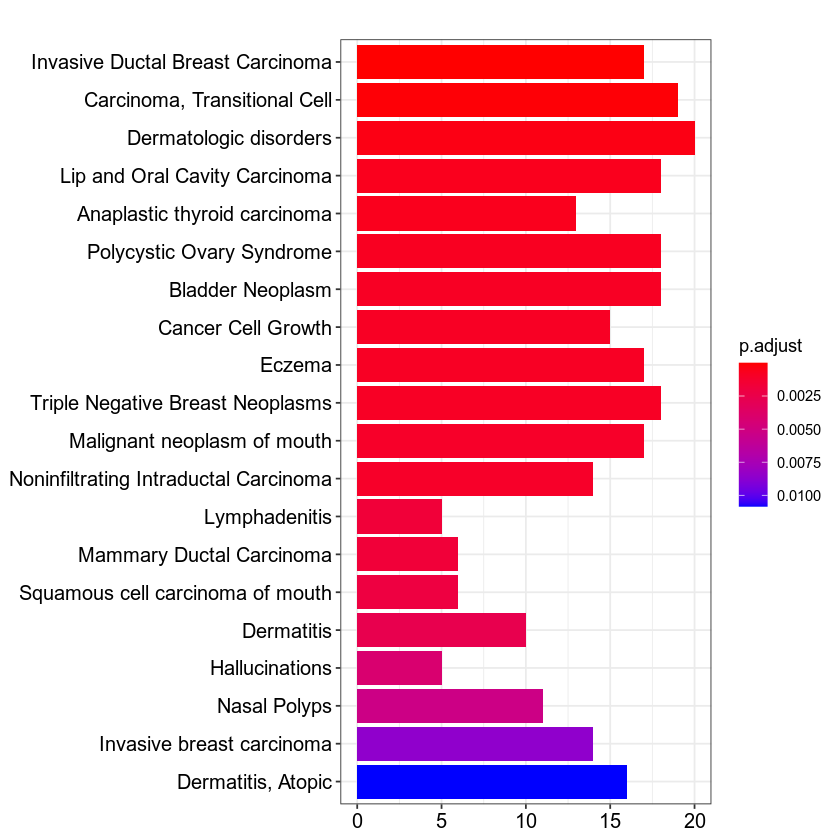

In [36]:
library(enrichplot)
barplot(edo, showCategory=20)

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
no term enriched under specific pvalueCutoff...



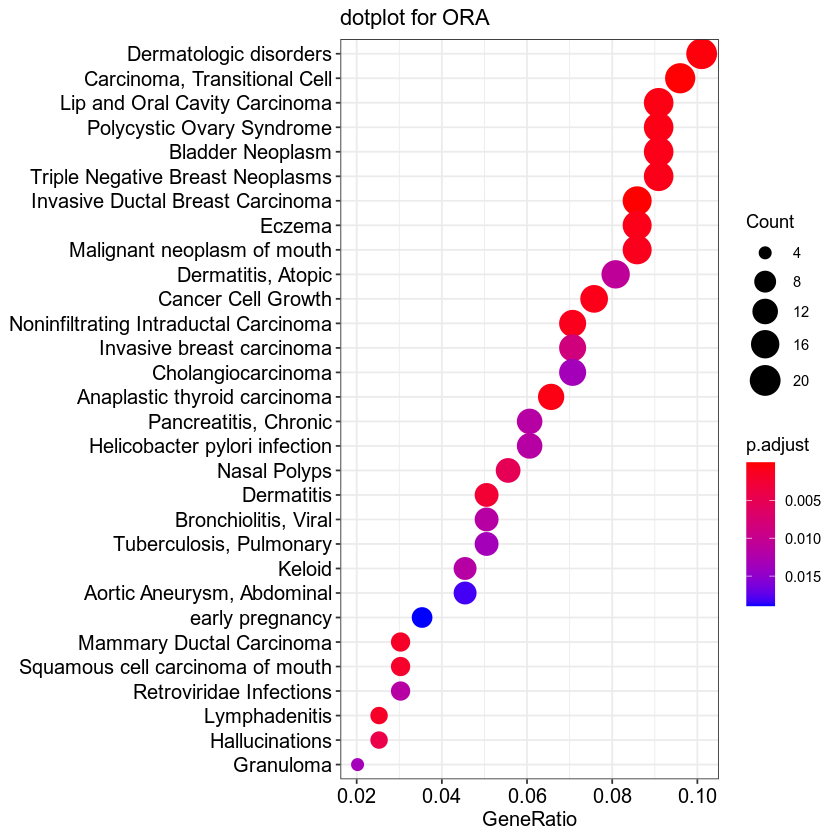

In [43]:
edo2 <- gseNCG(geneList, nPerm=10000)
p1 <- dotplot(edo, showCategory=30) + ggtitle("dotplot for ORA")
# p2 <- dotplot(edo2, showCategory=30) + ggtitle("dotplot for GSEA")
plot_grid(p1)

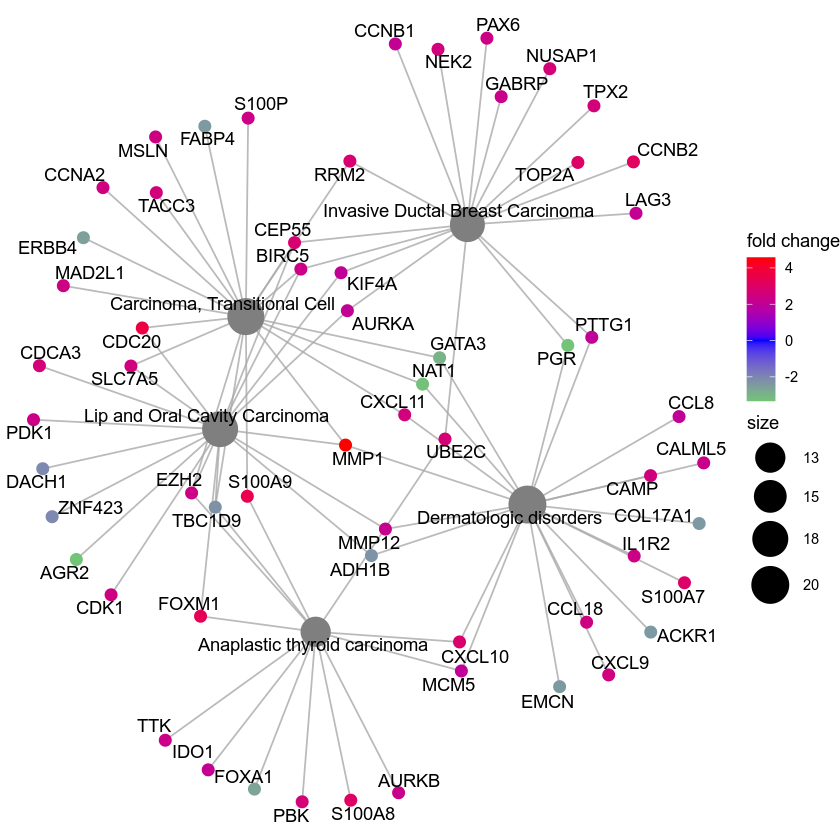

In [45]:
cnetplot(edox, foldChange=geneList)

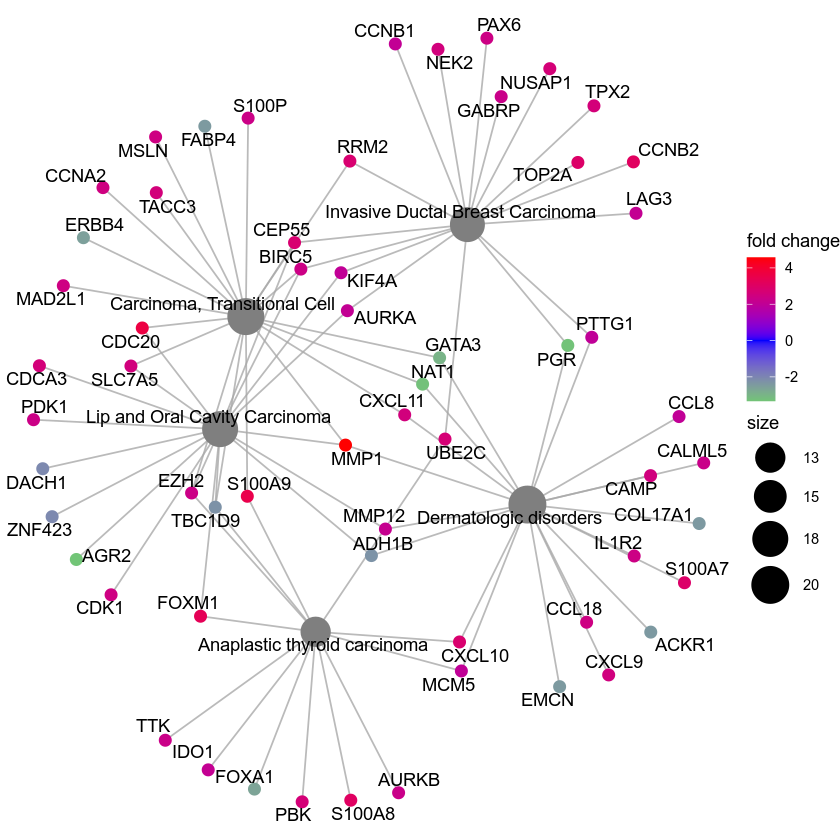

In [46]:
cnetplot(edox, categorySize="pvalue", foldChange=geneList)

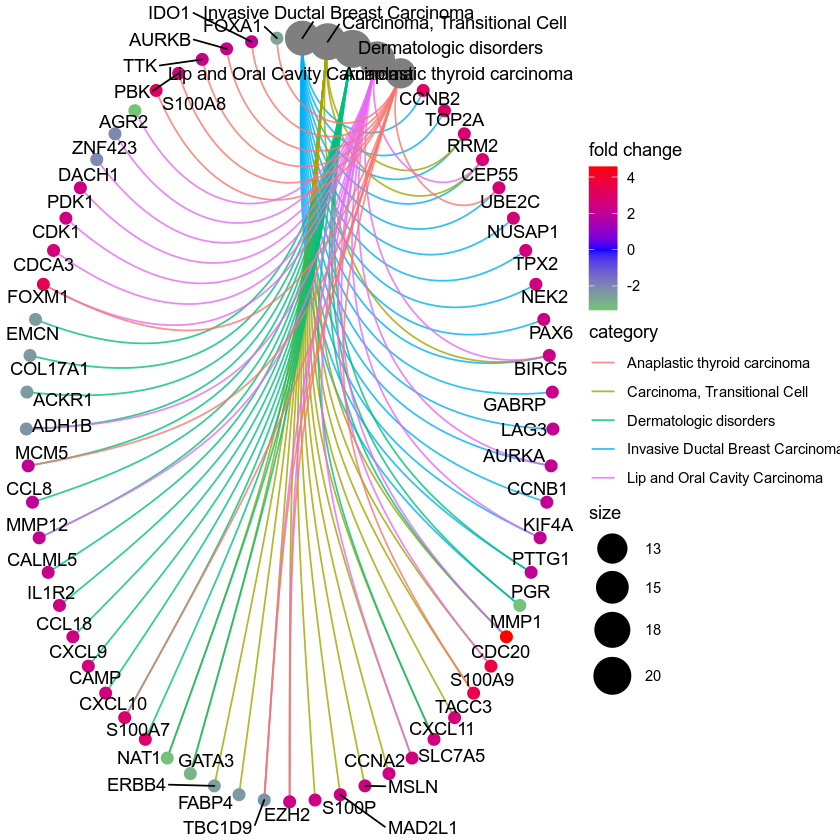

In [47]:
cnetplot(edox, foldChange=geneList, circular = TRUE, colorEdge = TRUE)

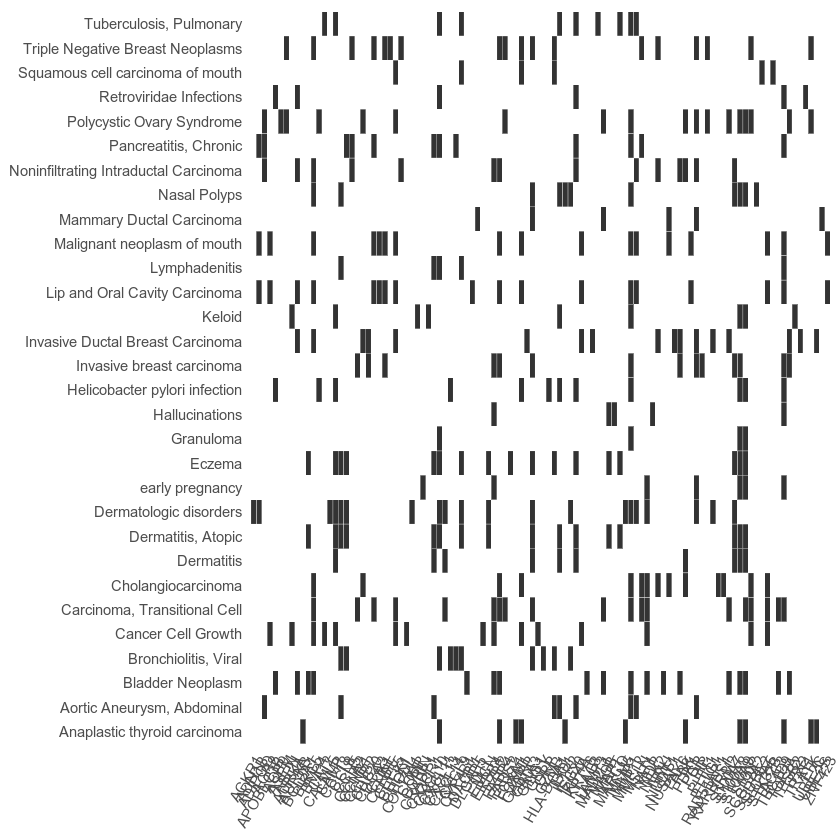

In [49]:
heatplot(edox)

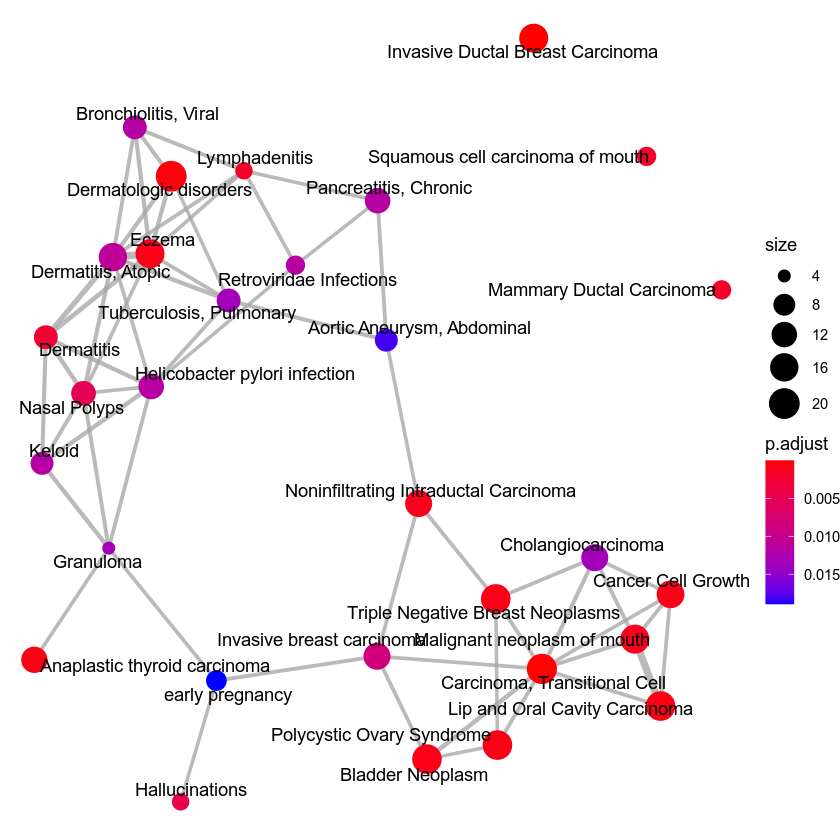

In [51]:
emapplot(edo)